<a href="https://colab.research.google.com/github/lequangtruongK50/BTVN-AI/blob/main/BT_Nh%E1%BA%ADn_di%E1%BB%87n_ng%C6%B0%E1%BB%9Di_v%C3%A0_bi%E1%BB%83u_c%E1%BA%A3m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -uq "/content/drive/MyDrive/LQT_data.zip" -d "/content/lqt_data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
unzip:  cannot find or open /content/drive/MyDrive/LQT_data.zip, /content/drive/MyDrive/LQT_data.zip.zip or /content/drive/MyDrive/LQT_data.zip.ZIP.


In [35]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

student_info = {
    'person1': {'name': 'Chi Kien', 'MSSV': '3124102xxxx'},
    'person2': {'name': 'Hoang Huy', 'MSSV': '31241022417'},
    'person4': {'name': 'Quang Truong', 'MSSV': '31241023392'},
    'person5': {'name': 'Xuan Loc', 'MSSV': '3124102xxxx'},
}

data = []
labels = []

base_dirr = '/content/drive/MyDrive/Train'

for person in os.listdir(base_dirr):
    person_path = os.path.join(base_dirr, person)
    if os.path.isdir(person_path):
        for emotion in os.listdir(person_path):
            emotion_path = os.path.join(person_path, emotion)
            for img_file in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (64, 64))
                data.append(img)
                labels.append((person, emotion))

X = np.array(data, dtype="float32") / 255.0
y_raw = ['{}_{}'.format(p, e) for p, e in labels]

le = LabelEncoder()
y = le.fit_transform(y_raw)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(y[0]), activation='softmax')  #đầu ra bằng số nhãn dc gán
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step - accuracy: 0.0813 - loss: 2.2075 - val_accuracy: 0.2326 - val_loss: 2.0847
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.1294 - loss: 2.0784 - val_accuracy: 0.1628 - val_loss: 2.0886
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - accuracy: 0.2183 - loss: 2.0714 - val_accuracy: 0.1628 - val_loss: 2.0664
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.1263 - loss: 2.0863 - val_accuracy: 0.1628 - val_loss: 2.0534
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.1757 - loss: 2.0477 - val_accuracy: 0.1860 - val_loss: 2.0397
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.1747 - loss: 2.0436 - val_accuracy: 0.2558 - val_loss: 2.0250
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.2214 - loss: 2.0319 - val_accuracy: 0.3023 - val_loss: 1.9230
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 0.2727 - loss: 1.9189 - val_accuracy: 0.2791 - val_loss: 1.8

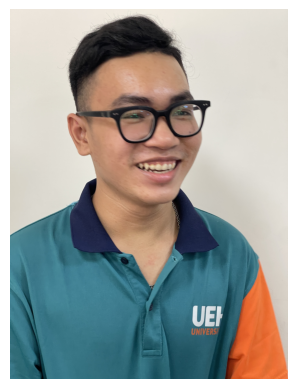

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Huy đang cảm thấy VUI


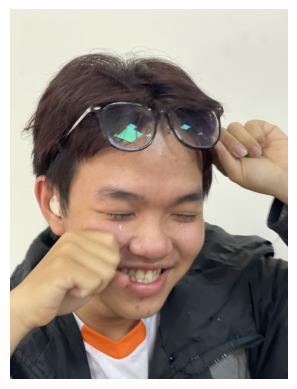

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Kien đang cảm thấy KHOC


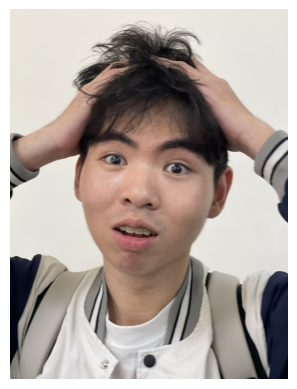

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Loc đang cảm thấy BAT NGO


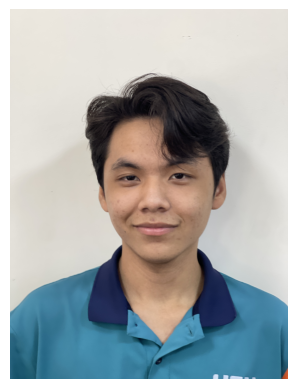

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Truong đang cảm thấy VUI


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import pickle
from PIL import Image, ImageOps

def predict_image(img_path):
    img_display = Image.open(img_path)
    img_display = ImageOps.exif_transpose(img_display)
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()

    img = img_display.resize((64, 64))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    class_index = np.argmax(pred)
    confidence = np.max(pred)
    label = le.inverse_transform([class_index])[0]

    try:
        name, emotion = label.split('_')
    except:
        name, emotion = "Unknown", "Unknown"

    print(f"{name} đang cảm thấy {emotion.upper()}")

predict_image("/content/IMG_2990.JPG")
predict_image("/content/IMG_2967.JPG")
predict_image("/content/IMG_3078.JPG")
predict_image("/content/IMG_2821.JPG")

